# XOR, Fully-connected ANN, and Nonlinear Boundaries

In [84]:
%matplotlib inline
# All imports
from random import choice
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display

## Part I
Using the XOR gate truth table as the training set for the 2-layer-3-neuron network. Please use the notation in LectureSlides Week8-1 to implement this neural network.

In [85]:
def sigmoid(x):
    '''The logistic function as the sigmoid'''
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_pr(z):
    '''derivative of the logistic function'''
    return z * (1 - z)
def tanh(x):
    sinh = (np.exp(x) - np.exp(-x))/2
    cosh = (np.exp(x) + np.exp(-x))/2
    return sinh/cosh
def tanh_prime(z):
    return 1 - z**2

In [ ]:
#Professor Solutions:
# class NeuralNetwork:
#     def __init__(self, layers, activation='sigmoid'):
#         if activation == 'sigmoid':
#             self.activation = sigmoid
#             self.activation_prime = sigmoid_pr
#         elif activation == 'tanh':
#             self.activation = tanh
#             self.activation_prime = tanh_prime
            
#         self.weights = []
        
#         for i in 

In [86]:
class NeuralNetwork():
    
    def __init__(self, layers, activation='sigmoid'):
        '''
            Constructor for class 
            Instanciating amount of layers, and activation function
        '''
        self.activation = activation
        
        #works for layers: 2, 2, 1 and layers: 2, 2, 2, 1
        self.inputLayerNeurons = layers[0]
        
        self.hiddenLayerNeurons = 0
        for i in range(1, len(layers)-1):
            self.hiddenLayerNeurons+=layers[i]
        self.size = self.inputLayerNeurons + self.hiddenLayerNeurons
        self.hidden_layer_output = np.zeros((self.size, 2))
        self.outputLayerNeurons = layers[-1]
        
        self.X = []
        
        self.weightsHidden = np.random.uniform(size=(self.inputLayerNeurons, self.hiddenLayerNeurons))
        #implicit bias = 1
        self.biasHidden = np.random.uniform(size=(1, self.hiddenLayerNeurons))
        self.weightsOutput = np.random.uniform(size=(self.hiddenLayerNeurons, self.outputLayerNeurons))
        self.biasOutput = np.random.uniform(size=(1, self.outputLayerNeurons))
        

    def fit(self, X, y, learning_rate=0.15, epochs=50000, tol=1e-2):
        '''
            Training
        ''' 
        self.X = X
        errors = []
        
        for _ in range(epochs):
            
            #Forward
            #z, b, A, a = simple_nn(X, w1new, w2new)
            #predicted output, z
            predicted_output = nn.predict(X)
            self.predictedOutput = predicted_output
            
#             plt.show()
            #Backward propagation
            #w2new, w1new = training_nn(X, y, z, w1, w2)
            error = []
            for i in range(len(y)):
                error.append(y[i] - predicted_output[i])
            errors.append(error)
            if self.activation=='sigmoid':
                #delta2 = error * sigmoid_pr(z)
                d_predicted_output = error * sigmoid_pr(predicted_output)
                #delta_w2 = np.dot(delta2, A)
                error_hidden_layer = d_predicted_output.dot(self.weightsOutput.T)
                #delta1 = np.atleast_2d(delta2 * sigmoid_pr(A) *w2)
                d_hidden_layer = error_hidden_layer * sigmoid_pr(self.hidden_layer_output)
            else:
                d_predicted_output = error * tanh_prime(predicted_output)
                error_hidden_layer = d_predicted_output.dot(self.weightsOutput.T)
                d_hidden_layer = error_hidden_layer * tanh_prime(self.hidden_layer_output)
            
            #Updating weigths and bias
            #w2 += (alpha * delta_w2)
            self.weightsOutput += self.hidden_layer_output.T.dot(d_predicted_output) * learning_rate
            self.biasOutput += np.sum(d_predicted_output,axis=0,keepdims=True) * learning_rate
            #w1 += (alpha * delta_w1)
            self.weightsHidden += X.T.dot(d_hidden_layer) * learning_rate
            self.biasHidden += np.sum(d_hidden_layer,axis=0,keepdims=True) * learning_rate
            
            if(_%(epochs/10)==0):
                print('step: ', _)
                print('Training Results(data, prediction, expected): ')
                for i in range(len(y)):
                    print(X[i], ', {:.5f}'.format(predicted_output[i][0]), ', ', y[i])
                RMS_err = nn.find_RMS_error(X, y)
                print('RMS_err: {:.5f}'.format(RMS_err), '\n')
                
                '''
                   Error - Loss function
                ''' 
                if _ > 0 :
                    loss = []
                    for i in range(_):
                        lossperepoch = []
                        for j in range(len(y)):
                            lossperepoch.append(errors[i][j][0])
                        loss.append(np.mean(lossperepoch))

                    window_size = 32
                    loss_smooth = np.convolve(loss, np.ones((window_size,))/window_size, mode='same')

                    plt.figure()
                    plt.plot(loss_smooth)
                    plt.plot(loss_smooth, 'r.')
                    plt.plot([0, _],[tol**2, tol**2],  '--', label='Target loss value (tol**2)')
                    plt.legend()
                    plt.ylabel('Loss Value (Error squared)')
                    plt.xlabel('Training Steps')
                    plt.ylim(-tol,)
    #                     display.clear_output(wait=True)
    #                     display.display(plt.gcf())
    #                     #gcf: grab current figure
    #                     time.sleep(0.5)
    #                     #clf clears past plot
    #                     plt.clf()
                    plt.show()
            
                
                if (RMS_err < tol):
                    print("NN training succeeded!")
                    break
            
            
        if RMS_err > tol:
            print("NN training failed.")
            
        '''
            Finally, apply the trained neural network to 2000 test data points. visual_NN_boundaries:
        '''
        
        nn.visual_NN_boundaries()


    def find_RMS_error(self, X, y):
        '''
            Find the “average error” by finding the RMS error for all the training data (first adding the
            square of the error for each entry in X, then dividing the sum by the number of entries in y (the
            target), and finally taking square root).
        '''
        RMStot = 0
        predicted_output = nn.predict(X)
        error = []      
        for i in range(len(y)):
            error = (y[i] - predicted_output[i][0])**2
            RMStot += error
        RMS_err = np.sqrt(RMStot/len(y))
        return RMS_err

    def predict(self, X):
        '''
            Classification, return z
            trainig data: X
            output weights: self.weightsOutput  
        '''
        #a = np.dot(X, self.weightsOutput) #w1new
        hidden_layer_activation = np.dot(X, self.weightsHidden)
        hidden_layer_activation += self.biasHidden
        
        
        if self.activation=='sigmoid':
            self.hidden_layer_output = sigmoid(hidden_layer_activation)
            output_layer_activation = np.dot(self.hidden_layer_output, self.weightsOutput)
            output_layer_activation += self.biasOutput
            output_layer_output = sigmoid(output_layer_activation)
        else:
            self.hidden_layer_output = tanh(hidden_layer_activation)
            output_layer_activation = np.dot(self.hidden_layer_output, self.weightsOutput)
            output_layer_activation += self.biasOutput
            output_layer_output = tanh(output_layer_activation)
            
        return output_layer_output

    def visual_NN_boundaries(self, Nsamp=2000):
        '''
            Finally, apply the trained neural network to 2000 test data points. 
            Let’s call the ith data point x; x[0] and x[1] should be between [0, 1] for all values of i. Use the results to visualize the boundary.
        '''
        # XOR training set
        x_arr = np.random.rand(Nsamp, 2)
        z_arr=nn.predict(x_arr)
        for i, x in enumerate(x_arr):
            if z_arr[i]<0.5:
                plt.plot(x[0], x[1], '.', color='b')
            else:
                plt.plot(x[0], x[1], '.', color='r')
                        
        if self.size==4:
            plt.plot([1, 0], [1, 0], 'bo', ms=10, label='Output = 0')
            plt.plot([0, 1], [1, 0], 'ro', ms=10, label='Output = 1')
        if self.size==6:
            plt.plot([0, 0, 0.5], [0, 1, 1], 'bo', ms=10, label='Output = 0')
            plt.plot([0, 1, 1], [0.5, 0, 1], 'ro', ms=10, label='Output = 1')

        plt.xlabel('x1')
        plt.ylabel('x2')
        #plt.legend()
        plt.show()

### Main Program

step:  0
Training Results(data, prediction, expected): 
[0 0] , 0.62585 ,  0
[0 1] , 0.76191 ,  1
[1 0] , 0.81367 ,  1
[1 1] , 0.84916 ,  0
RMS_err: 0.52509 

step:  1000
Training Results(data, prediction, expected): 
[0 0] , 0.00168 ,  0
[0 1] , 0.96695 ,  1
[1 0] , 0.96697 ,  1
[1 1] , 0.00314 ,  0
RMS_err: 0.02341 



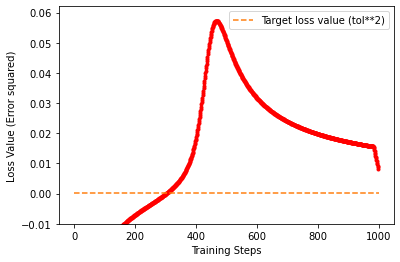

step:  2000
Training Results(data, prediction, expected): 
[0 0] , 0.00051 ,  0
[0 1] , 0.98212 ,  1
[1 0] , 0.98213 ,  1
[1 1] , 0.00089 ,  0
RMS_err: 0.01264 



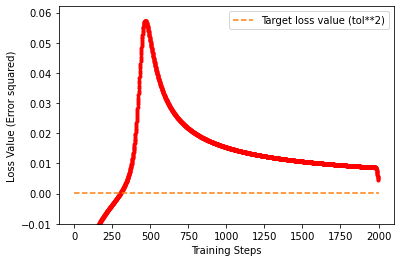

step:  3000
Training Results(data, prediction, expected): 
[0 0] , 0.00029 ,  0
[0 1] , 0.98654 ,  1
[1 0] , 0.98655 ,  1
[1 1] , 0.00050 ,  0
RMS_err: 0.00952 



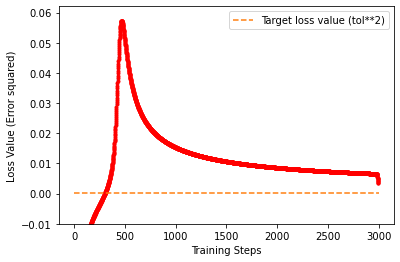

NN training succeeded!


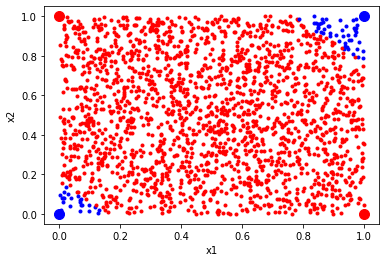

In [87]:
nn = NeuralNetwork([2, 2, 1], activation='tanh')

#XOR training data
X1 = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])
#outcomes, target, expected values
y1 = np.array([0, 1, 1, 0])
nn.fit(X1, y1, epochs=10000)
plt.show()
plt.close('all')

## Part II

step:  0
Training Results(data, prediction, expected): 
[0. 0.] , 0.64200 ,  0
[0. 1.] , 0.89005 ,  0
[0.5 1. ] , 0.90742 ,  0
[0.  0.5] , 0.81484 ,  1
[1. 0.] , 0.79432 ,  1
[1. 1.] , 0.91662 ,  1
RMS_err: 0.54889 

step:  8000
Training Results(data, prediction, expected): 
[0. 0.] , 0.01654 ,  0
[0. 1.] , 0.01436 ,  0
[0.5 1. ] , 0.01655 ,  0
[0.  0.5] , 0.98804 ,  1
[1. 0.] , 0.99930 ,  1
[1. 1.] , 0.98870 ,  1
RMS_err: 0.01311 



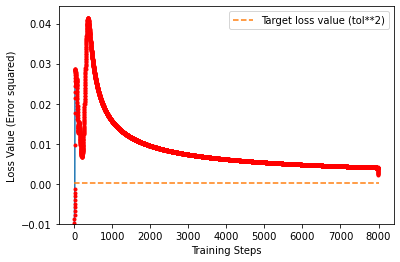

step:  16000
Training Results(data, prediction, expected): 
[0. 0.] , 0.01126 ,  0
[0. 1.] , 0.00967 ,  0
[0.5 1. ] , 0.01111 ,  0
[0.  0.5] , 0.99196 ,  1
[1. 0.] , 0.99963 ,  1
[1. 1.] , 0.99229 ,  1
RMS_err: 0.00885 



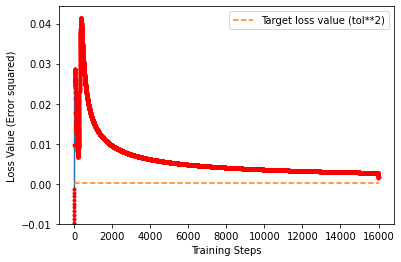

NN training succeeded!


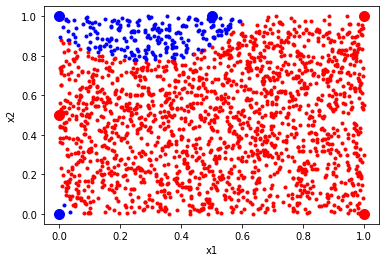

In [88]:
nn = NeuralNetwork([2, 2, 2, 1], activation='tanh')

#XOR training data
X2 = np.array([[0, 0], 
              [0, 1], 
              [0.5, 1], 
              [0, 0.5], 
              [1, 0], 
              [1, 1]])

#outcomes, target, expected values
y2 = np.array([0, 0, 0, 1, 1, 1])
nn.fit(X2, y2, epochs=80000)
plt.show()
plt.close('all')

## Bonus Part:
Live update the training process.